In [ ]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('../..')))

import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from reservoirgrid.helpers import chaos_utils
from reservoirgrid.helpers import viz

In [2]:
path = "../../Examples/Input_Discretization/results/Chaotic/"
save_path = "../../Examples/Input_Discretization/Plots/SingleMetric/"
system_name = "Lorenz"
system_path = os.path.join(path, system_name)

In [3]:
file = os.path.join(system_path, "100.0.pkl")
with open(file, "rb") as f:
    data_10 = pickle.load(f)

In [4]:
all_lyapunov = []
all_kldiv = []
all_params = []
all_jsdiv = []
all_skl = []

for data in data_10:
    lyap1 = chaos_utils.lyapunov_time(data["true_value"], data["predictions"])
    Kldiv = chaos_utils.kl_divergence(data["true_value"], data["predictions"])
    jsdiv = chaos_utils.js_divergence(data["true_value"], data["predictions"])
    skl = chaos_utils.symmetric_kl(data["true_value"], data["predictions"])
    all_skl.append(skl)
    all_jsdiv.append(jsdiv)
    all_lyapunov.append(lyap1)
    all_kldiv.append(Kldiv)
    params = data["parameters"]
    all_params.append(params)

In [5]:
np.argmin(all_kldiv), np.argmin(all_jsdiv), np.argmin(all_skl)

(np.int64(60), np.int64(223), np.int64(223))

In [6]:
jsidx = np.argpartition(all_jsdiv, 10)[:10]
klidx = np.argpartition(all_kldiv, 10)[:10]
sklidx = np.argpartition(all_skl, 10)[:10]

In [13]:
selected = 3
viz.compare_plot([data_10[sklidx[selected]]["true_value"], data_10[sklidx[selected]]["predictions"]], 
                 legend_names=["True Value", "Predictions"], 
                 title="Symmetric KL Divergence")

viz.compare_plot([data_10[jsidx[selected]]["true_value"], data_10[jsidx[selected]]["predictions"]], 
                 legend_names=["True Value", "Predictions"], 
                 title="Jensen-Shannon Divergence")

viz.compare_plot([data_10[klidx[selected]]["true_value"], data_10[klidx[selected]]["predictions"]], 
                 legend_names=["True Value", "Predictions"], 
                 title="KL Divergence")

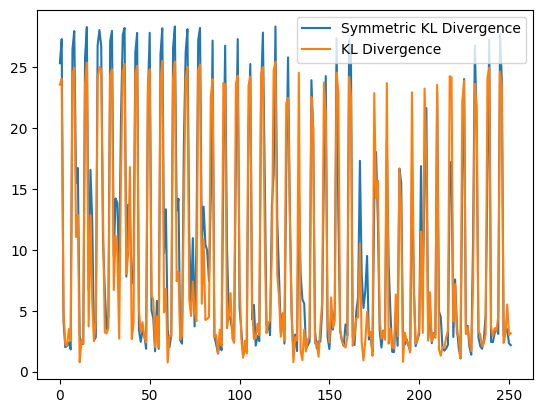

In [8]:
plt.plot(all_skl, label="Symmetric KL Divergence")
plt.plot(all_kldiv, label="KL Divergence")
plt.legend()
plt.show()

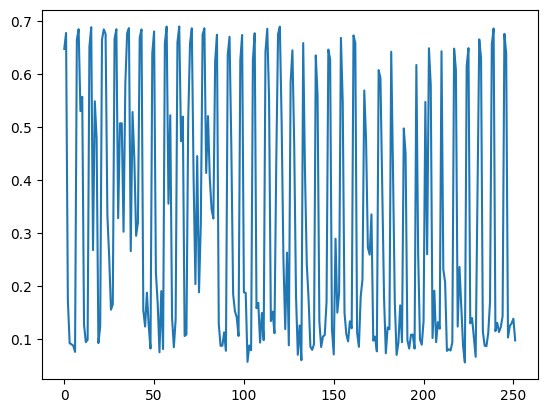

In [9]:
plt.plot(all_jsdiv)